In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

In [2]:
experiment = "MOS2_150uW_9K"
ref_file = 'data/GGHO_2023.05.30_THZ1_000'  # 0001 to 0005 .txt
sample_file = 'data/GGHO_2023.05.30_THZ1_003'  # 0032 to 0036 .txt
start_ref = 1
stop_ref = 5
start_sample = 2
stop_sample = 6
assert stop_ref - start_ref == stop_sample - start_sample

In [3]:
def plot_my_freq_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], np.real(complex_array)[0:last], 'xr', label='real')
    plt.plot(freqs[0:last], -1.0 * np.imag(complex_array)[0:last], 'xb', label='imag')
    # plt.plot(freqs[0:last], np.abs(complex_array)[0:last], 'xg', label='abs')
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(experiment+'_fft_average.png')

In [4]:
index_ref = start_ref
index_sample = start_sample

ref_file_index = ref_file + str(index_ref) + '.txt'
# print(ref_file_index)
ref = np.loadtxt(fname=ref_file_index, delimiter=' ')

sample_file_index = sample_file + str(index_sample) + '.txt'
# print(sample_file_index)
sample = np.loadtxt(fname=sample_file_index, delimiter=' ')

index_ref +=1
index_sample +=1

while index_ref <= stop_ref:
    ref_file_index = ref_file + str(index_ref) + '.txt'
    # print(ref_file_index)
    ref += np.loadtxt(fname=ref_file_index, delimiter=' ')

    sample_file_index = sample_file + str(index_sample) + '.txt'
    # print(sample_file_index)
    sample += np.loadtxt(fname=sample_file_index, delimiter=' ')
    
    index_ref +=1
    index_sample +=1

In [5]:
ref = ref / (1 + stop_ref - start_ref)
sample = sample / (1 + stop_sample - start_sample)

Text(0.5, 1.0, 'averaged ref data, columns 1 and 2, against column 0')

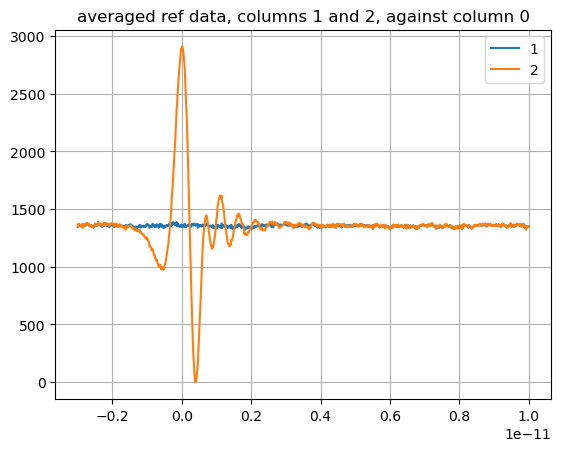

In [6]:
# plt.ylim((-500, 3500))
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged ref data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged ref data, columns 2 - 1, against column 0')

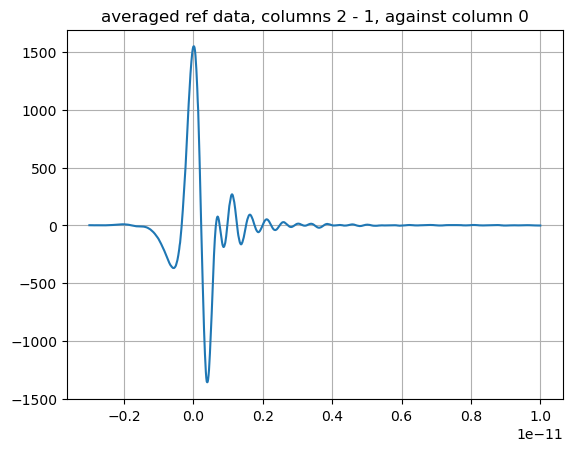

In [7]:
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1])
plt.grid()
plt.title('averaged ref data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 1 and 2, against column 0')

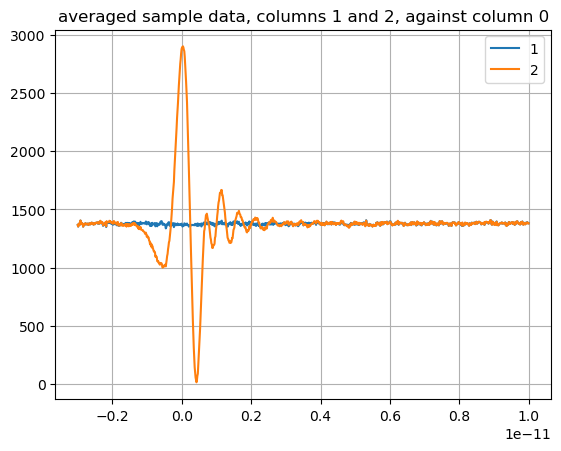

In [8]:
# plt.ylim((-500, 3500))
for col in range(1, sample.shape[1]):
    plt.plot(sample[:, 0], sample[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged sample data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 2 - 1, against column 0')

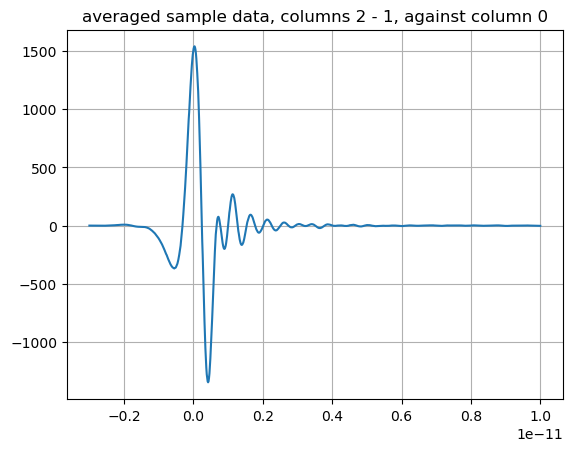

In [9]:
plt.plot(sample[:, 0], sample[:, 2] - sample[:, 1])
plt.grid()
plt.title('averaged sample data, columns 2 - 1, against column 0')

In [10]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref)
xf = fftfreq(N, T)

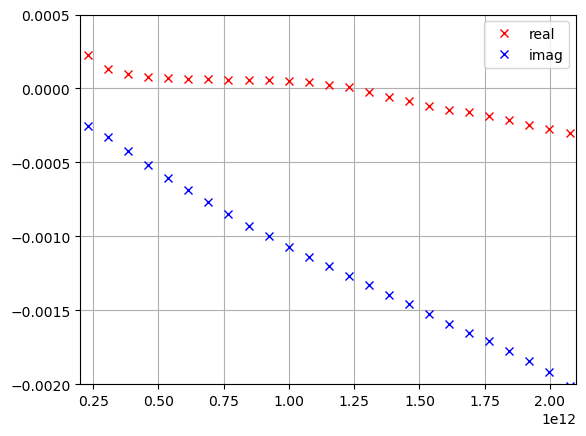

In [11]:
result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1])) -1.)
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plot_my_freq_array(xf, result, half=True)

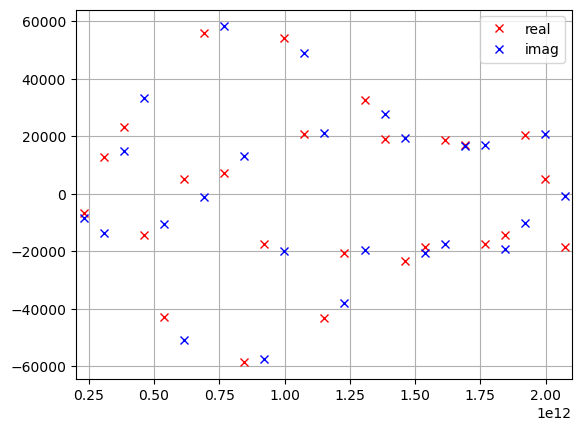

In [12]:
plt.xlim((0.2e12, 2.1e12))
plot_my_freq_array(xf, fft(ref[:, 2] - ref[:, 1]), half=True)

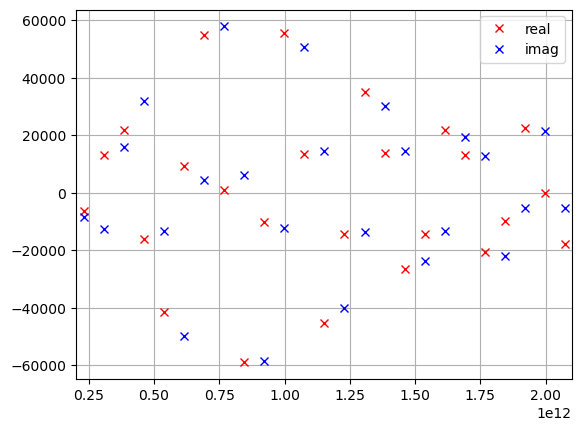

In [13]:
plt.xlim((0.2e12, 2.1e12))
plot_my_freq_array(xf, fft(sample[:, 2] - sample[:, 1]), half=True)

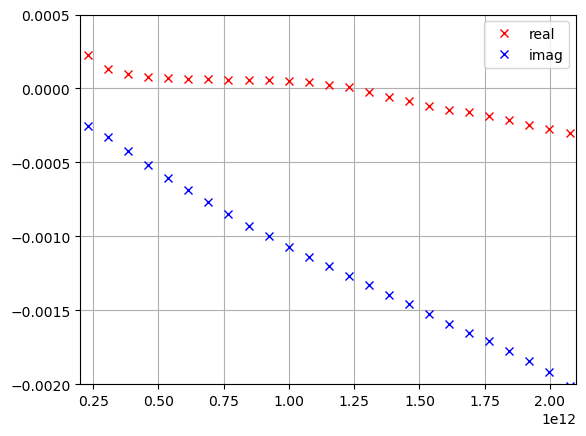

In [14]:
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plot_my_freq_array(xf, 0.007965 * (fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1]) - 1.), half=True)

(-1500.0, 1700.0)

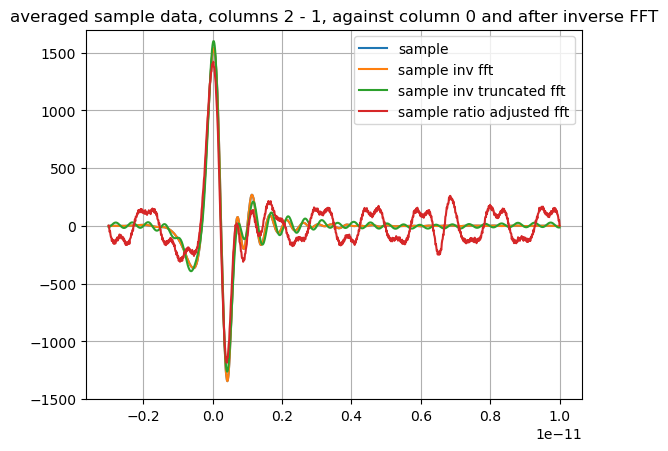

In [15]:
plt.plot(sample[:, 0], sample[:, 2] - sample[:, 1], label='sample')
sample_fft = fft(sample[:, 2] - sample[:, 1])
ref_fft = fft(ref[:, 2] - ref[:, 1])
plt.plot(sample[:, 0], np.real(ifft(fft(sample[:, 2] - sample[:, 1]))), label="sample inv fft")

# Filter out high and low frequencies
x_min = 0.2e12
x_max = 2.1e12

cp_sample_fft = sample_fft.copy()
for i in range(len(xf)):
    if abs(xf[i]) < x_min or abs(xf[i]) > x_max:
        cp_sample_fft[i] = 0.+0.j
plt.plot(sample[:, 0], np.real(ifft(cp_sample_fft)), label="sample inv truncated fft")   

# Filter out high and low frequencies and set imaginary part to zero
#no_imag_sample_fft = sample_fft.copy()
#for i in range(len(xf)):
#    if abs(xf[i]) < x_min or abs(xf[i]) > x_max:
#        no_imag_sample_fft[i] = 0.+0.j
#    else:
#        no_imag_sample_fft[i] = complex(np.real(no_imag_sample_fft[i]), 0.)
#plt.plot(sample[:, 0], np.real(ifft(no_imag_sample_fft)), label="sample inv truncated no imag fft")

# Set ratio imaginary part of sample/ref to ratio of real part
ratio_sample_fft = sample_fft.copy()
for i in range(len(xf)):
    rat = np.real(sample_fft[i]) * np.imag(ref_fft[i]) / np.real(ref_fft[i])
    ratio_sample_fft[i] = complex(np.real(sample_fft[i]), rat)
plt.plot(sample[:, 0], np.real(ifft(ratio_sample_fft)), label="sample ratio adjusted fft")        

plt.grid()
plt.legend()
plt.title('averaged sample data, columns 2 - 1, against column 0 and after inverse FFT')

#plt.xlim((-0.07e-11, 0.1e-11))
plt.ylim((-1500, 1700))

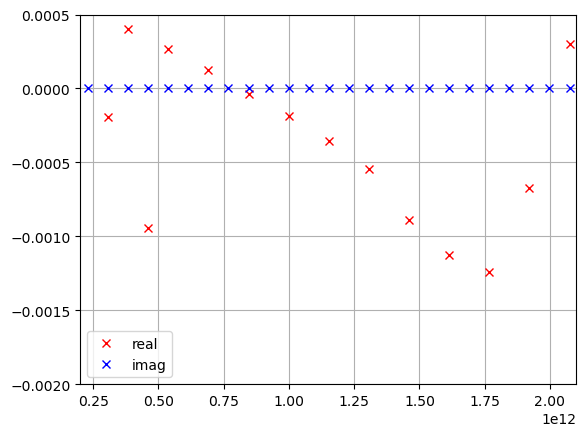

In [16]:
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
#plot_my_freq_array(xf, 0.007965 * (fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1]) - 1.), half=True)
plot_my_freq_array(xf, 0.007965 * (fft(ref[:, 2] - ref[:, 1]) / ratio_sample_fft - 1.), half=True)

# Original

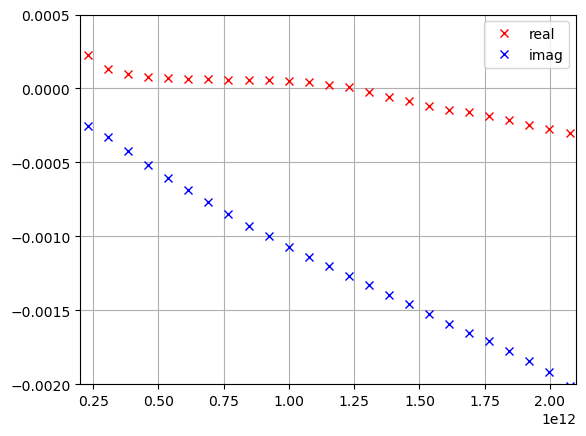

In [17]:
result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1])) -1.)
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plot_my_freq_array(xf, result, half=True)

# Now shift sample to right in time

In [18]:
shifts = 2
sample_shift = sample.copy()
print(sample_shift, "\n---\n")
sample_shift[shifts:] = sample[:-shifts]
for i in range(shifts):
    sample_shift[i][1:3] = 0.
for i in range(len(sample_shift)):
    sample_shift[i][0] = sample[i][0]
print(sample_shift)

[[-3.0000000e-12  1.3649290e+03  1.3654808e+03]
 [-2.9869870e-12  1.3516986e+03  1.3524668e+03]
 [-2.9739740e-12  1.3765600e+03  1.3768978e+03]
 ...
 [ 9.9739740e-12  1.3809252e+03  1.3791018e+03]
 [ 9.9869870e-12  1.3826034e+03  1.3806178e+03]
 [ 1.0000000e-11  1.3806206e+03  1.3790790e+03]] 
---

[[-3.0000000e-12  0.0000000e+00  0.0000000e+00]
 [-2.9869870e-12  0.0000000e+00  0.0000000e+00]
 [-2.9739740e-12  1.3649290e+03  1.3654808e+03]
 ...
 [ 9.9739740e-12  1.3820952e+03  1.3803106e+03]
 [ 9.9869870e-12  1.3906348e+03  1.3890078e+03]
 [ 1.0000000e-11  1.3809252e+03  1.3791018e+03]]


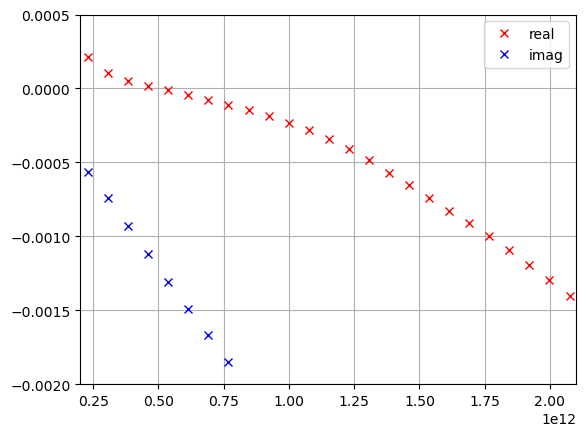

In [19]:
result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample_shift[:, 2] - sample_shift[:, 1])) -1.)
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plot_my_freq_array(xf, result, half=True)

# Now shift sample to left in time

In [26]:
shifts = 2
sample_shift = sample.copy()
print(sample_shift, "\n---\n")
sample_shift[:-shifts] = sample[shifts:]
for i in range(shifts):
    sample_shift[-i-1][1:3] = 0.
for i in range(len(sample_shift)):
    sample_shift[i][0] = sample[i][0]
print(sample_shift)

[[-3.0000000e-12  1.3649290e+03  1.3654808e+03]
 [-2.9869870e-12  1.3516986e+03  1.3524668e+03]
 [-2.9739740e-12  1.3765600e+03  1.3768978e+03]
 ...
 [ 9.9739740e-12  1.3809252e+03  1.3791018e+03]
 [ 9.9869870e-12  1.3826034e+03  1.3806178e+03]
 [ 1.0000000e-11  1.3806206e+03  1.3790790e+03]] 
---

[[-3.0000000e-12  1.3765600e+03  1.3768978e+03]
 [-2.9869870e-12  1.3682306e+03  1.3687498e+03]
 [-2.9739740e-12  1.3686492e+03  1.3688448e+03]
 ...
 [ 9.9739740e-12  1.3806206e+03  1.3790790e+03]
 [ 9.9869870e-12  0.0000000e+00  0.0000000e+00]
 [ 1.0000000e-11  0.0000000e+00  0.0000000e+00]]


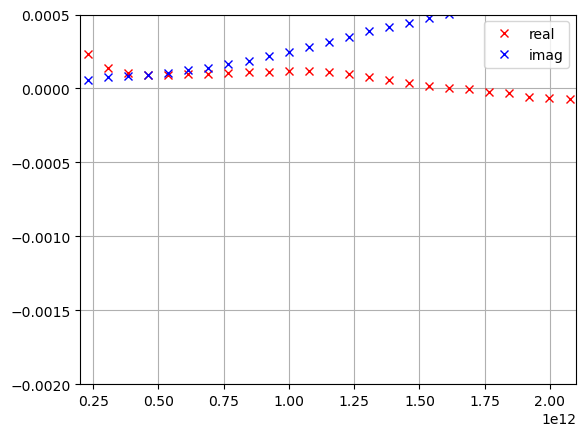

In [27]:
result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample_shift[:, 2] - sample_shift[:, 1])) -1.)
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plot_my_freq_array(xf, result, half=True)

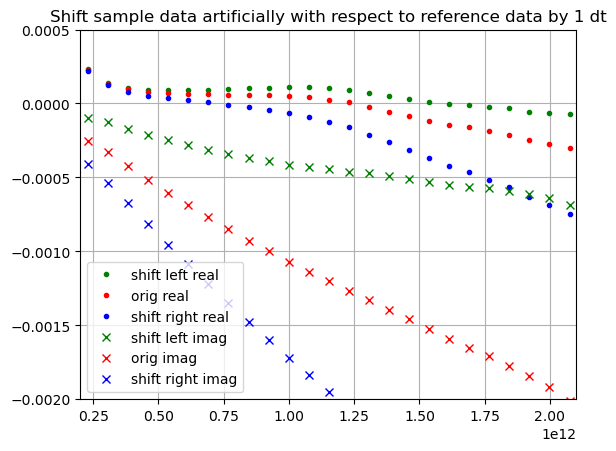

In [31]:
shifts = 1
sample_shift_right = sample.copy()
sample_shift_right[shifts:] = sample[:-shifts]
for i in range(shifts):
    sample_shift_right[i][1:3] = 0.
for i in range(len(sample_shift)):
    sample_shift_right[i][0] = sample[i][0]

sample_shift_left = sample.copy()
sample_shift_left[:-shifts] = sample[shifts:]
for i in range(shifts):
    sample_shift_left[-i-1][1:3] = 0.
for i in range(len(sample_shift)):
    sample_shift_left[i][0] = sample[i][0]

result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1])) -1.)
result_shift_right = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample_shift_right[:, 2] - sample_shift_right[:, 1])) -1.)
result_shift_left = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample_shift_left[:, 2] - sample_shift_left[:, 1])) -1.)
last = len(xf)//2
plt.plot(xf[0:last], np.real(result_shift_left)[0:last], '.g', label='shift left real')
plt.plot(xf[0:last], np.real(result)[0:last], '.r', label='orig real')
plt.plot(xf[0:last], np.real(result_shift_right)[0:last], '.b', label='shift right real')
plt.plot(xf[0:last], -1.0 * np.imag(result_shift_left)[0:last], 'xg', label='shift left imag')
plt.plot(xf[0:last], -1.0 * np.imag(result)[0:last], 'xr', label='orig imag')
plt.plot(xf[0:last], -1.0 * np.imag(result_shift_right)[0:last], 'xb', label='shift right imag')
plt.legend()
plt.grid()
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.002, .0005))
plt.title('Shift sample data artificially with respect to reference data by 1 dt')
plt.savefig('shift_sample_fft_average.png')